<a href="https://colab.research.google.com/github/AlexMa123/BIU-ComplexSystem/blob/main/Lecture%204%20-%20SOC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Self-Organized Criticality

Self-organized criticality (SOC) is a phenomenon observed in certain complex systems of multiple interacting components, e.g., neural networks, forest fires, and power grids, that produce power-law distributed avalanche sizes.

## Motivation of SoC

1. The existence of the ubiquitous "1/f" noise which has been detected
for transport in systems as diverse as resistors, the hour
glass, the flow of the river Nile, and the luminosity of
stars.

2. Explain the self-similar fractal structures, icluding cosmic strings, mountain landscapes, and coastallines. The common feature for all these systems is the power-law temporal or spatial correlations.

## Bak-Tang-Wiesenfeld (BTW) model

### Algorithm of the BTW model

There are four steps in the model:

**1.Initialisation** Prepare the system in an arbitrary stable configuration with $z_i \leq z^{th}$ for all i

**2. Drive** Add a grain at random site $(x, y)$.

$$z_{x, y} = z_{x, y} + 2$$
$$z_{x - 1, y} = z_{x - 1, y} - 1$$
$$z_{x, y - 1} = z_{x, y - 1} - 1$$

**3. Relaxation** If $z_{x, y} > z ^{th}$, relax site i.

$$z_{x, y} = z_{x, y} - 4$$

$$z_{x - 1, y} = z_{x - 1, y} + 1$$
$$z_{x + 1, y} = z_{x + 1, y} + 1$$
$$z_{x, y - 1} = z_{x, y - 1} + 1$$
$$z_{x, y + 1} = z_{x, y + 1} + 1$$


|![sandpile model](https://pic3.zhimg.com/v2-8a85f7a72cc6b06602e3f5afd60cf34a_b.webp)|
|------------------------------------------------------------------------------------|
|An example of Avalanche whose size = 8|

### Computational simulation

In [6]:
!pip install git+https://github.com/SocSIM/SocSIM.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/SocSIM/SocSIM.git to /tmp/pip-req-build-hkh6o8oz
  Running command git clone -q https://github.com/SocSIM/SocSIM.git /tmp/pip-req-build-hkh6o8oz
     |████████████████████████████████| 191 kB 4.1 MB/s 
     |████████████████████████████████| 6.7 MB 50.7 MB/s 
  Created wheel for SocSIM: filename=SocSIM-0.2.0-py3-none-any.whl size=16214 sha256=27a74e17ce75f005fa19dbe540202366f24c06be5d6a829e353c5ceebb62de87
  Stored in directory: /tmp/pip-ephem-wheel-cache-tgq7odwd/wheels/dd/95/44/dd5b8a757647c345257cef9489164ea04ea0b25376d43bf655
  Created wheel for asciitree: filename=asciitree-0.3.3-py3-none-any.whl size=5050 sha256=5f8bf9c1c34334f0802a3ddae304a667e6bb1940d3243b8f3b65cb724a08895a
  Stored in directory: /root/.cache/pip/wheels/a3/d7/75/19cd0d2a893cad4bb0b2b16dd572ad2916d19c0d5ee9612511
Successfully built SocSIM asciitree


In [7]:
from SOC.models import BTW
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'

Prepare a system full of zero with a size=10, run 1000 steps.

In [8]:
btw_model = BTW(10)
print(btw_model.values)
btw_model.run(1000)

[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
Waiting for wait_for_n_iters=10 iterations before collecting data. This should let the system thermalize.


  0%|          | 0/1010 [00:00<?, ?it/s]

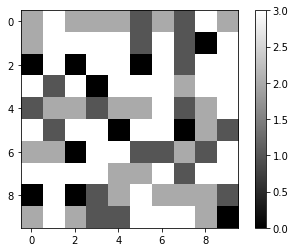

In [9]:
fig = btw_model.plot_state()

In [ ]:
btw_model.animate_states(notebook=True)

### Get the avalance data

In [ ]:
btw_model.data_df # The result is saved inside a panda's dataframe

,AvalancheSize,number_of_iterations
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
995,8,2
996,55,20
997,0,0
998,0,0


In [ ]:
df = btw_model.data_df # The result is saved inside a panda's dataframe
df

,AvalancheSize,number_of_iterations
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
995,8,2
996,55,20
997,0,0
998,0,0


<AxesSubplot:>

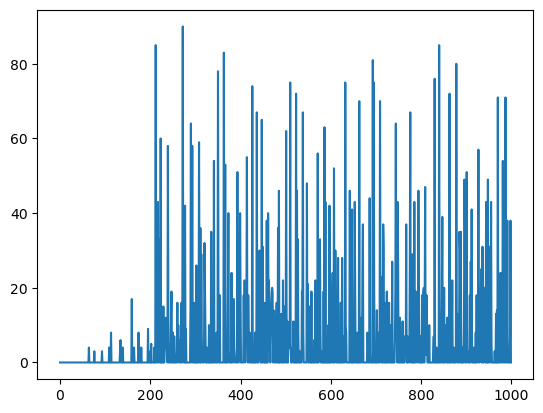

In [ ]:
btw_model.data_df['AvalancheSize'].plot()

What will the avalanche size looks like if we choose a larger system? Will the size also become larger ?

In [ ]:
btw_largermodel = BTW(50)
btw_largermodel.run(10000)

Waiting for wait_for_n_iters=10 iterations before collecting data. This should let the system thermalize.


  0%|          | 0/10010 [00:00<?, ?it/s]

<AxesSubplot:>

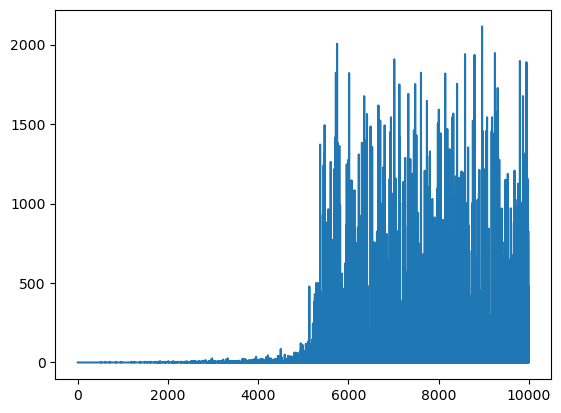

In [ ]:
btw_largermodel.data_df['AvalancheSize'].plot()

### Statistics of the Avalanche Size

Although inside this package, they provided a function to find the exponent, but they didn't use the log binning, which makes the histogram very noisy.

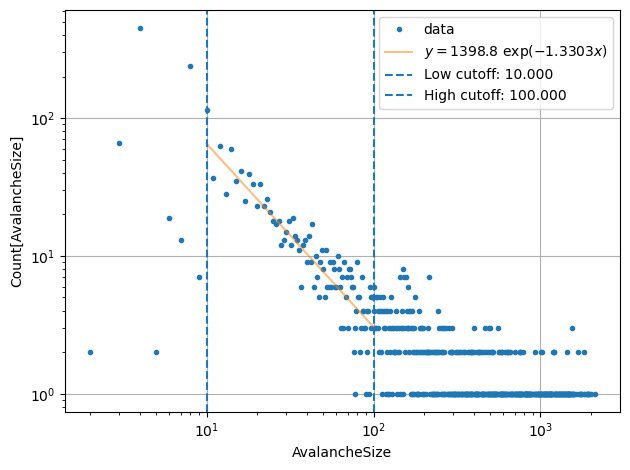

y = 1398.837 exp(-1.3303 x)


{'exponent': -1.3302775503283182, 'intercept': 3.145766997373802}

In [ ]:
btw_largermodel.get_exponent(low=10, high=100)

In [ ]:
import numpy as np
a_size = btw_largermodel.data_df['AvalancheSize']
bins = np.logspace(1, 3, 20) # define the binning

density, bin_edges = np.histogram(a_size, bins=bins, density=True)
bin_center = (bin_edges[:-1] + bin_edges[1:]) / 2

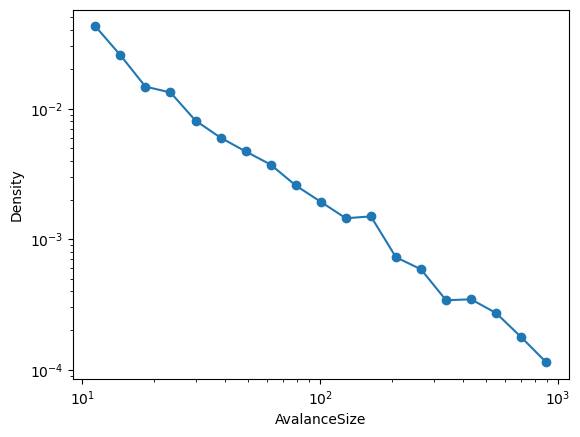

In [ ]:
plt.plot(bin_center, density, 'o-')
plt.xlabel("AvalanceSize")
plt.ylabel("Density")
plt.xscale('log')
plt.yscale('log')

The histrogram shows a straight line in log-log plot. which means the distribution of Avalance's size is a power-law distribtuion
$$f(size) = C  size^{- \alpha}$$

$$\log f = - \alpha \log{size} + \log {C}$$

So we can apply a linear fit to obtain the exponent

In [ ]:
pars = np.polyfit(np.log(bin_center), np.log(density), deg=1)
print(f"The exponent is {pars[0]}")

The exponent is -1.2737768504376286


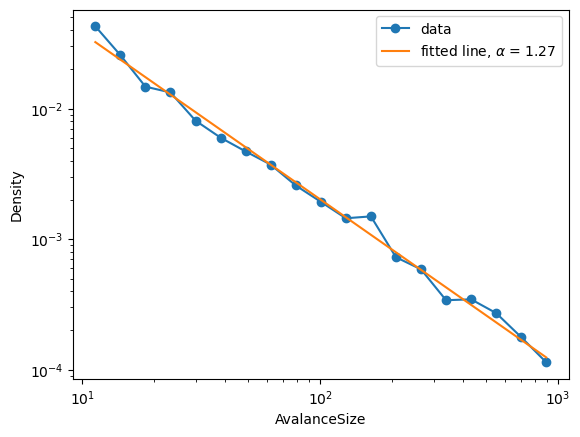

In [ ]:
plt.plot(bin_center, density, 'o-', label='data')
plt.plot(bin_center, np.exp(pars[0] * np.log(bin_center) + pars[1]), label=r'fitted line, $\alpha$'+ f' = {- pars[0]:.2f}')
plt.legend()
plt.xlabel("AvalanceSize")
plt.ylabel("Density")
plt.xscale('log')
plt.yscale('log')

## An example of SOC: Earthquakes

Earthquakes are probably the most relevant paradigm
of self-organized criticality. In 1956 Gutenberg and
Richter realized that the rate of occurrence of earthquakes of magnitude M greater than m is given by the relation

$$\log_{10} N(M > m) = a - b m $$

The energy E released during the earthquake is believed to increase exponentially with the earthquake magnitude

$$ \log_{10} E = c + d m $$

One of the model to explain how earthquake occurs is ***Olami–Feder–Christensen (OFC) Earthquake Model***

|![sandpile model](https://github.com/AlexMa123/BIU-ComplexSystem/blob/main/figures/spring_model.png?raw=true)|
|------------------------------------------------------------------------------------|
|The geometry of the spring-block model. |

The total force exerted by the spring on a given block (i, j) is:

$$F_{i, j} = K_1 [2 dx_{i, j} - d x_{i - 1, j} - d x_{i + 1, j}] + K_2 [2 d x_{i, j} - d x_{i, j - 1} - d x_{i, j + 1}] + K_L d x_i, j$$

F in this model is just like z in BTW model

When the two rigid plates move relative to each other
the total force on each block increases uniformly (with a
rate proportional to KL V, where V is the relative velocity
between the two rigid plates) until one site reaches the
threshold value and the process of relaxation begins (an
earthquake is triggered). It can easily be shown that the
redistribution of strain after a local slip at the position
(ij ) is given by the relation


$$F_{i\pm1, j} = F_{i\pm1, j} + \alpha_1 F_{i, j}$$
$$F_{i, j\pm1} = F_{i, j\pm1} + \alpha_2 F_{i, j}$$
$$F_{i, j } = 0$$

In [ ]:
from SOC.models import OFC

In [ ]:
sim0 = OFC( L=30, save_every = 1)
sim0.run(5000, wait_for_n_iters=1000)

Waiting for wait_for_n_iters=1000 iterations before collecting data. This should let the system thermalize.


  0%|          | 0/6000 [00:00<?, ?it/s]

In [ ]:
sim0.data_df

,AvalancheSize,NumberOfReleases,number_of_iterations
0,16,7,3
1,180,133,29
2,4,1,1
3,4,1,1
4,13,4,4
...,...,...,...
4995,47,25,13
4996,634,1233,125
4997,601,1553,98
4998,7,2,2


<AxesSubplot:>

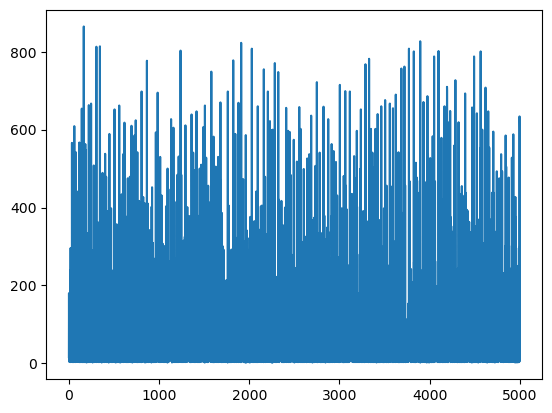

In [ ]:
sim0.data_df.AvalancheSize.plot()

number of releases is the total number of relaxations, which is proportional to the earthquake energy.

<AxesSubplot:>

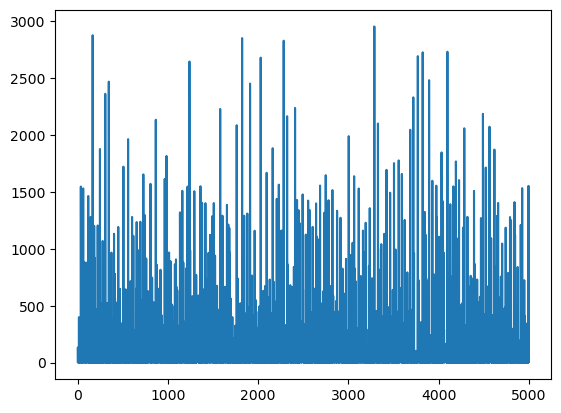

In [ ]:
sim0.data_df.NumberOfReleases.plot()

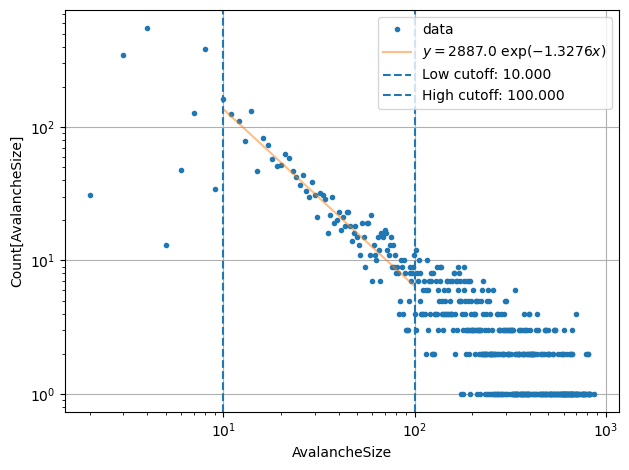

y = 2886.989 exp(-1.3276 x)


{'exponent': -1.3275674365948176, 'intercept': 3.4604451729603545}

In [ ]:
sim0.get_exponent(low=10, high=100)

# Exercise

1. Renormalization on triangular lattice
Try to find out $p_c$ by using renormalization. Compare your result with the real Percolation threshold. You can find the real value from : https://en.wikipedia.org/wiki/Percolation_threshold


|![triangular lattice](https://github.com/AlexMa123/BIU-Computational-Physics-2022/blob/main/img/percolation/tra_percolation.png?raw=True)|
|:-:|
|*triangular lattice*|

|![triangular lattice](https://github.com/AlexMa123/BIU-Computational-Physics-2022/blob/main/img/percolation/tra_percolation_cg.png?raw=True)|
|:-:|
|*coarse graining rule for triangular lattice*|


2. find out the critical exponent $\nu$ for triangular lattice

3. Here are the monthly new influenza cases in China from 2014 to 2022 that was extracted from the National Health Commission of the People's Republic of China (http://www.nhc.gov.cn/wjw/yqbb/list.shtml)

Please 1. count a histogram  of the new cases (choose bins range from $10^4$ to $10^6$) 2. Whether do you think it's a power law distribution or not? 3. If it is a power law distribution, fit the exponent

In [2]:
import pandas as pd

In [4]:
data = pd.read_csv("https://raw.githubusercontent.com/AlexMa123/BIU-ComplexSystem/main/Influenza.csv", index_col=0)

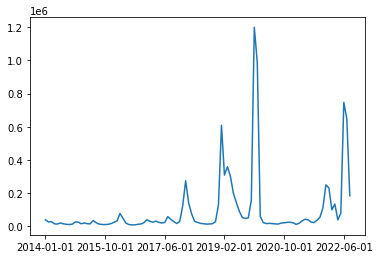

In [5]:
data['Positive Cases'].plot()

In [ ]:
data

,Positive Cases
2014-01-01,38214
2014-02-01,25279
2014-03-01,27262
2014-04-01,14166
2014-05-01,12685
...,...
2022-04-01,37567
2022-05-01,78687
2022-06-01,747038
2022-07-01,648465
